<a href="https://colab.research.google.com/github/pgs17/PYTHON_Packages/blob/master/__NBA_SALARY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import math

# if using a colab GPU
if(tf.config.list_physical_devices('GPU')):
  print('Yes')

In [2]:
nba_data=pd.read_csv("https://raw.githubusercontent.com/derekbanas/tensorflow/main/nba_salary_stats.csv")
nba_data.head(10)

,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,603,0.439,56,156,0.359,209,447,0.468,0.486,78,131,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,729,0.557,0,6,0.000,406,723,0.562,0.557,256,340,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,458,0.550,14,46,0.304,238,412,0.578,0.566,89,102,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,569,0.448,159,389,0.409,96,180,0.533,0.588,64,74,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,545,0.677,1,10,0.100,368,535,0.688,0.678,165,233,0.708,192,410,602,92,44,75,94,97,904
5,Jose,Alvarado,NOP,1500000.0,PG,23,54,1,834,131,294,0.446,32,110,0.291,99,184,0.538,0.500,36,53,0.679,25,75,100,152,71,7,40,73,330
6,Kyle,Anderson,MEM,9937150.0,PF,28,69,11,1484,209,469,0.446,36,109,0.330,173,360,0.481,0.484,67,105,0.638,69,299,368,183,77,45,71,108,521
7,Giannis,Antetokounmpo,MIL,39344970.0,PF,27,67,67,2204,689,1245,0.553,71,242,0.293,618,1003,0.616,0.582,553,766,0.722,134,644,778,388,72,91,219,212,2002
8,Carmelo,Anthony,LAL,2641691.0,PF,37,69,3,1793,319,723,0.441,149,397,0.375,170,326,0.521,0.544,132,159,0.830,62,226,288,68,47,52,59,166,919
9,Cole,Anthony,ORL,3449400.0,PG,21,65,65,2059,357,912,0.391,132,391,0.338,225,521,0.432,0.464,216,253,0.854,32,316,348,369,46,17,170,171,1062


In [3]:
nba_data_num=nba_data.copy()
nba_data_num.head(5)

,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,603,0.439,56,156,0.359,209,447,0.468,0.486,78,131,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,729,0.557,0,6,0.000,406,723,0.562,0.557,256,340,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,458,0.550,14,46,0.304,238,412,0.578,0.566,89,102,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,569,0.448,159,389,0.409,96,180,0.533,0.588,64,74,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,545,0.677,1,10,0.100,368,535,0.688,0.678,165,233,0.708,192,410,602,92,44,75,94,97,904


In [4]:
nba_data_num.drop(['first_name','last_name'],axis=1,inplace=True)
nba_data_num.head(15)

,team,salary,pos,age,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,TOR,2711280.0,C,22,73,28,1725,265,603,0.439,56,156,0.359,209,447,0.468,0.486,78,131,0.595,146,327,473,82,37,41,84,151,664
1,MIA,28103550.0,C,24,56,56,1825,406,729,0.557,0,6,0.000,406,723,0.562,0.557,256,340,0.753,137,427,564,190,80,44,148,171,1068
2,BRK,2641691.0,C,36,47,12,1050,252,458,0.550,14,46,0.304,238,412,0.578,0.566,89,102,0.873,73,185,258,42,14,47,44,78,607
3,MIL,4054695.0,SG,26,66,61,1805,255,569,0.448,159,389,0.409,96,180,0.533,0.588,64,74,0.865,32,190,222,100,46,18,43,96,733
4,CLE,20000000.0,C,23,56,56,1809,369,545,0.677,1,10,0.100,368,535,0.688,0.678,165,233,0.708,192,410,602,92,44,75,94,97,904
5,NOP,1500000.0,PG,23,54,1,834,131,294,0.446,32,110,0.291,99,184,0.538,0.500,36,53,0.679,25,75,100,152,71,7,40,73,330
6,MEM,9937150.0,PF,28,69,11,1484,209,469,0.446,36,109,0.330,173,360,0.481,0.484,67,105,0.638,69,299,368,183,77,45,71,108,521
7,MIL,39344970.0,PF,27,67,67,2204,689,1245,0.553,71,242,0.293,618,1003,0.616,0.582,553,766,0.722,134,644,778,388,72,91,219,212,2002
8,LAL,2641691.0,PF,37,69,3,1793,319,723,0.441,149,397,0.375,170,326,0.521,0.544,132,159,0.830,62,226,288,68,47,52,59,166,919
9,ORL,3449400.0,PG,21,65,65,2059,357,912,0.391,132,391,0.338,225,521,0.432,0.464,216,253,0.854,32,316,348,369,46,17,170,171,1062


In [7]:
nba_data_num.drop(['team','pos'],axis=1,inplace=True)
nba_data_num.head(5)

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,0.359,209,447,0.468,0.486,78,131,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,0.000,406,723,0.562,0.557,256,340,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,0.304,238,412,0.578,0.566,89,102,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,0.409,96,180,0.533,0.588,64,74,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,0.100,368,535,0.688,0.678,165,233,0.708,192,410,602,92,44,75,94,97,904


In [8]:
# A function to convert cuurency with dollar sign or commas to float use isinstance to check if both are same
def clean_currency(currency_columns):
  if isinstance(currency_columns,str):
    return(currency_columns.replace('$', "").replace(',', ""))
  return currency_columns


In [9]:
nba_data_num['salary']=nba_data_num['salary'].apply(clean_currency).astype('float')
nba_data_num.head()

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,0.359,209,447,0.468,0.486,78,131,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,0.000,406,723,0.562,0.557,256,340,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,0.304,238,412,0.578,0.566,89,102,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,0.409,96,180,0.533,0.588,64,74,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,0.100,368,535,0.688,0.678,165,233,0.708,192,410,602,92,44,75,94,97,904


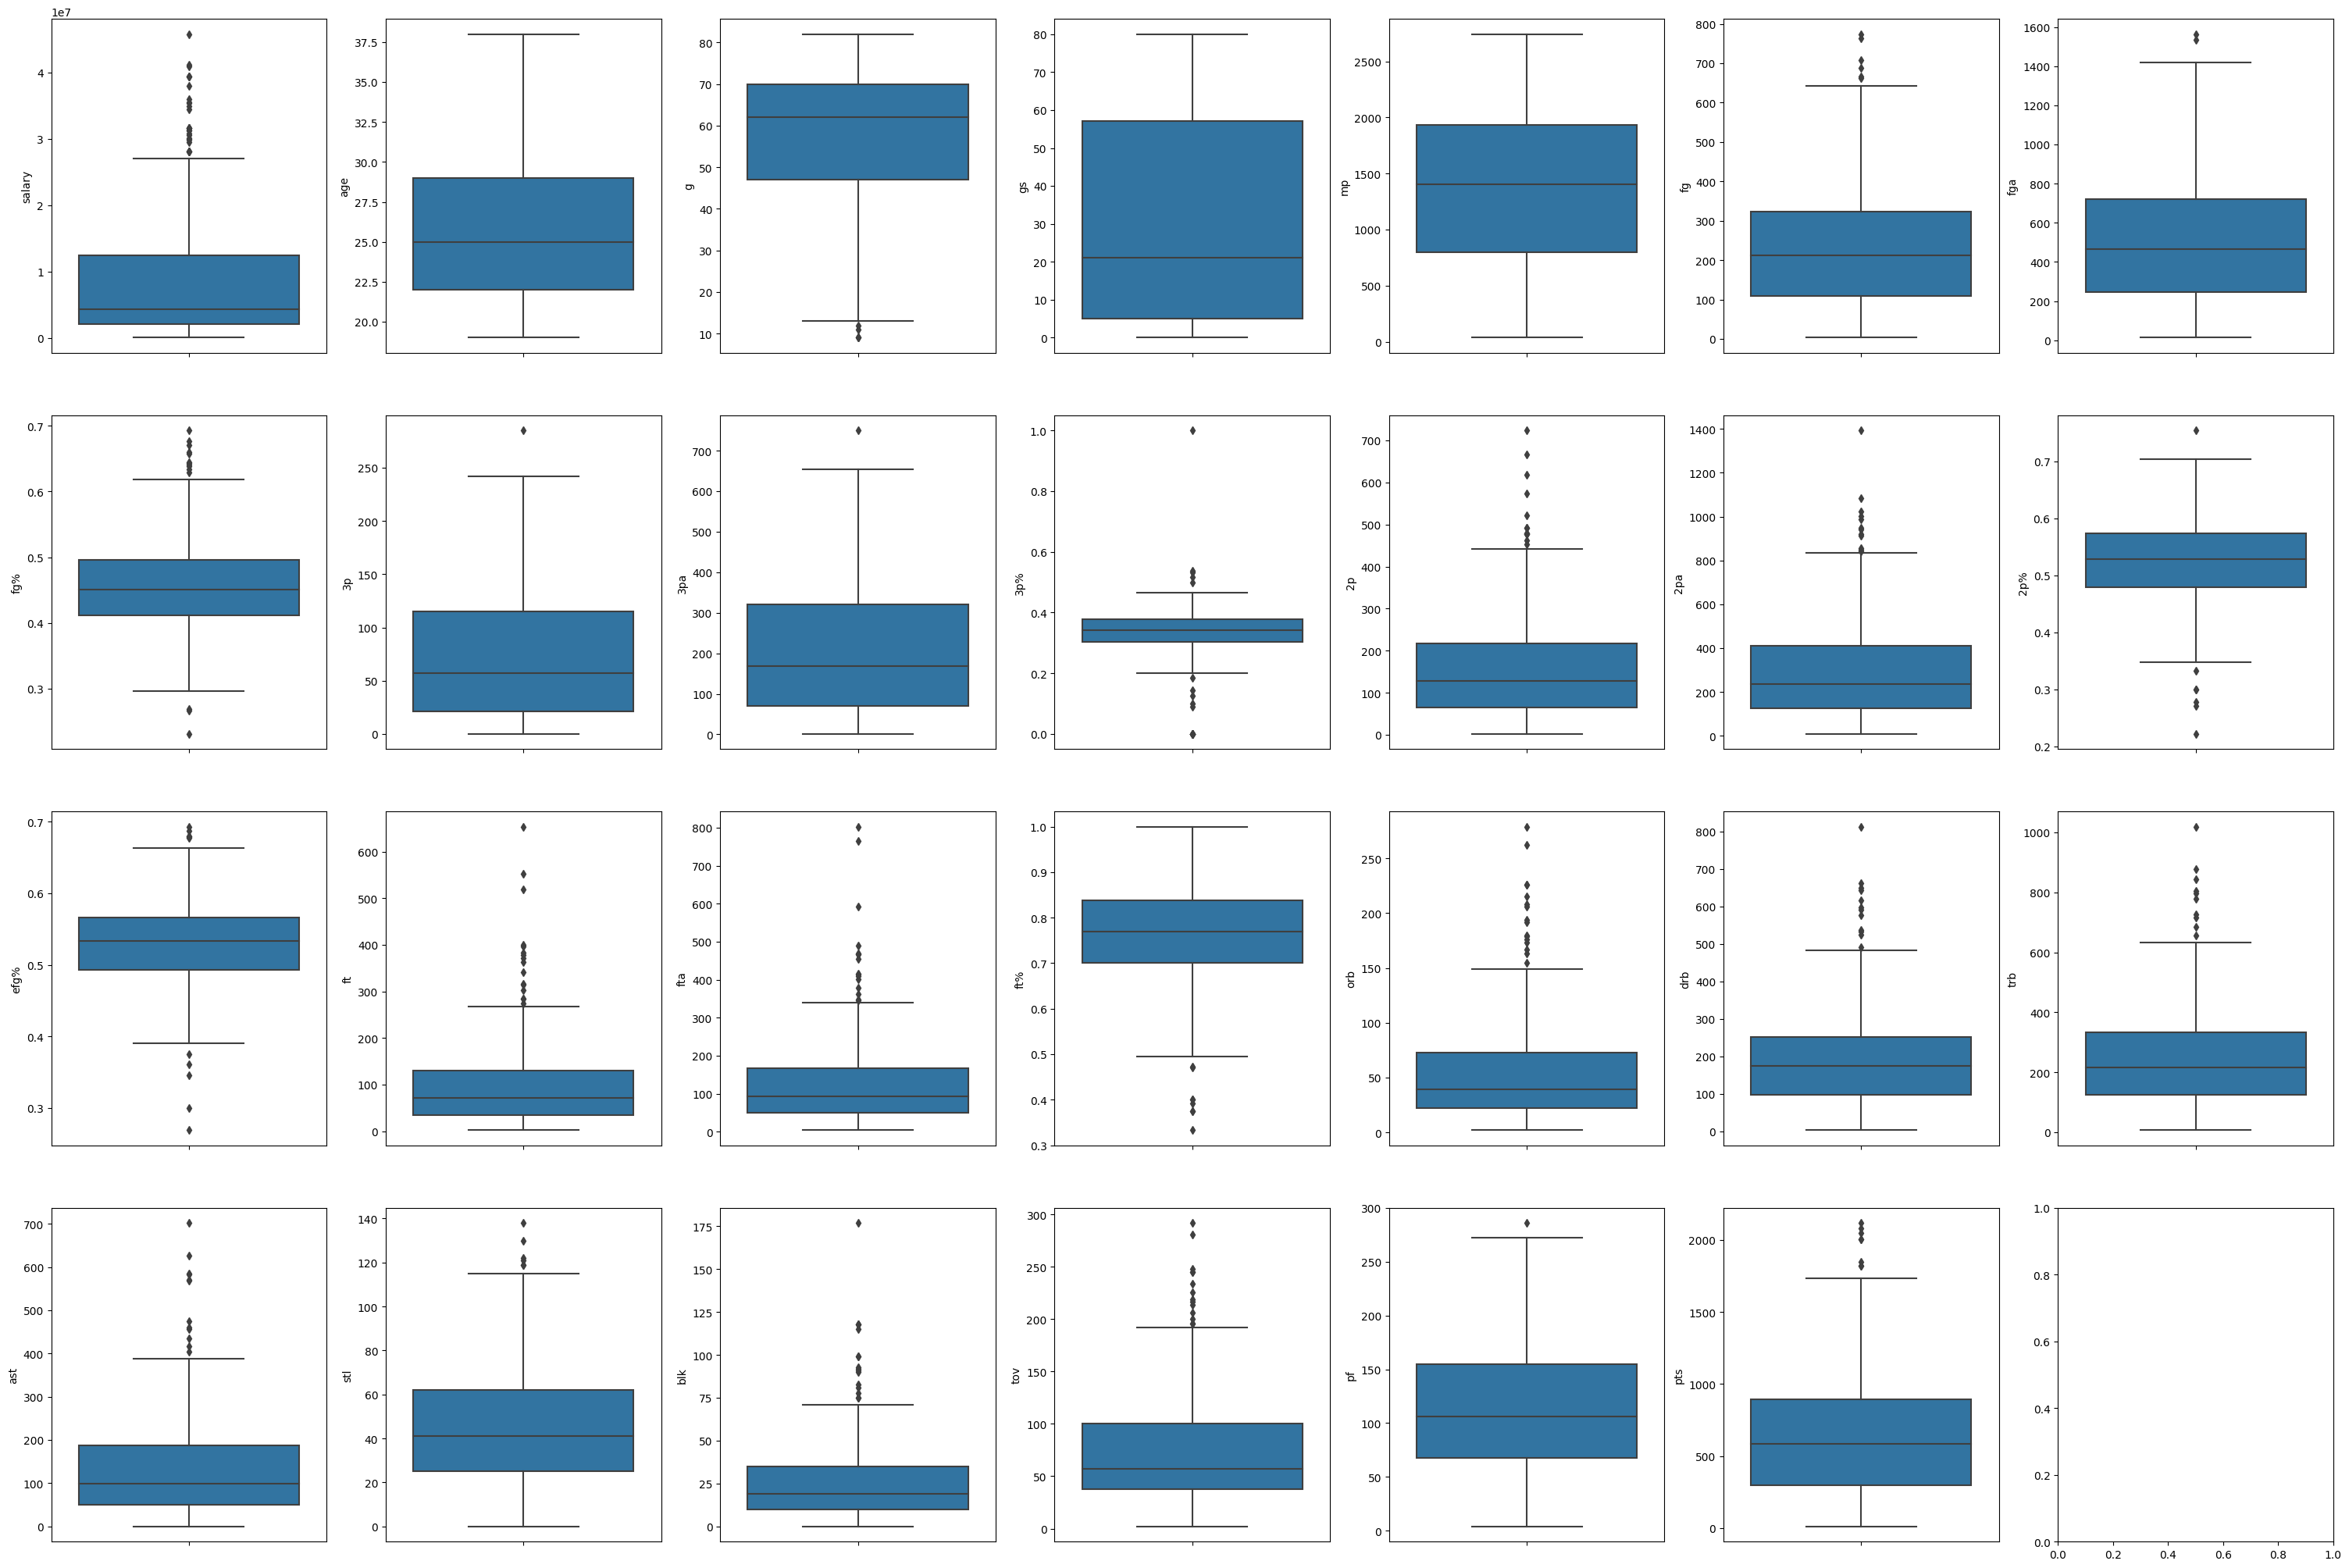

In [10]:
fig,axes=plt.subplots(nrows=4,ncols=7,figsize=(30,20))
index=0
axes=axes.flatten()
# iterate over coloumns of the dataframe using items its returns column name and cntent
for k,v in nba_data_num.items():
  sns.boxplot(y=k,data=nba_data_num,ax=axes[index])
  index+=1
plt.tight_layout(h_pad=5.0,w_pad=0.8,pad=0.4)


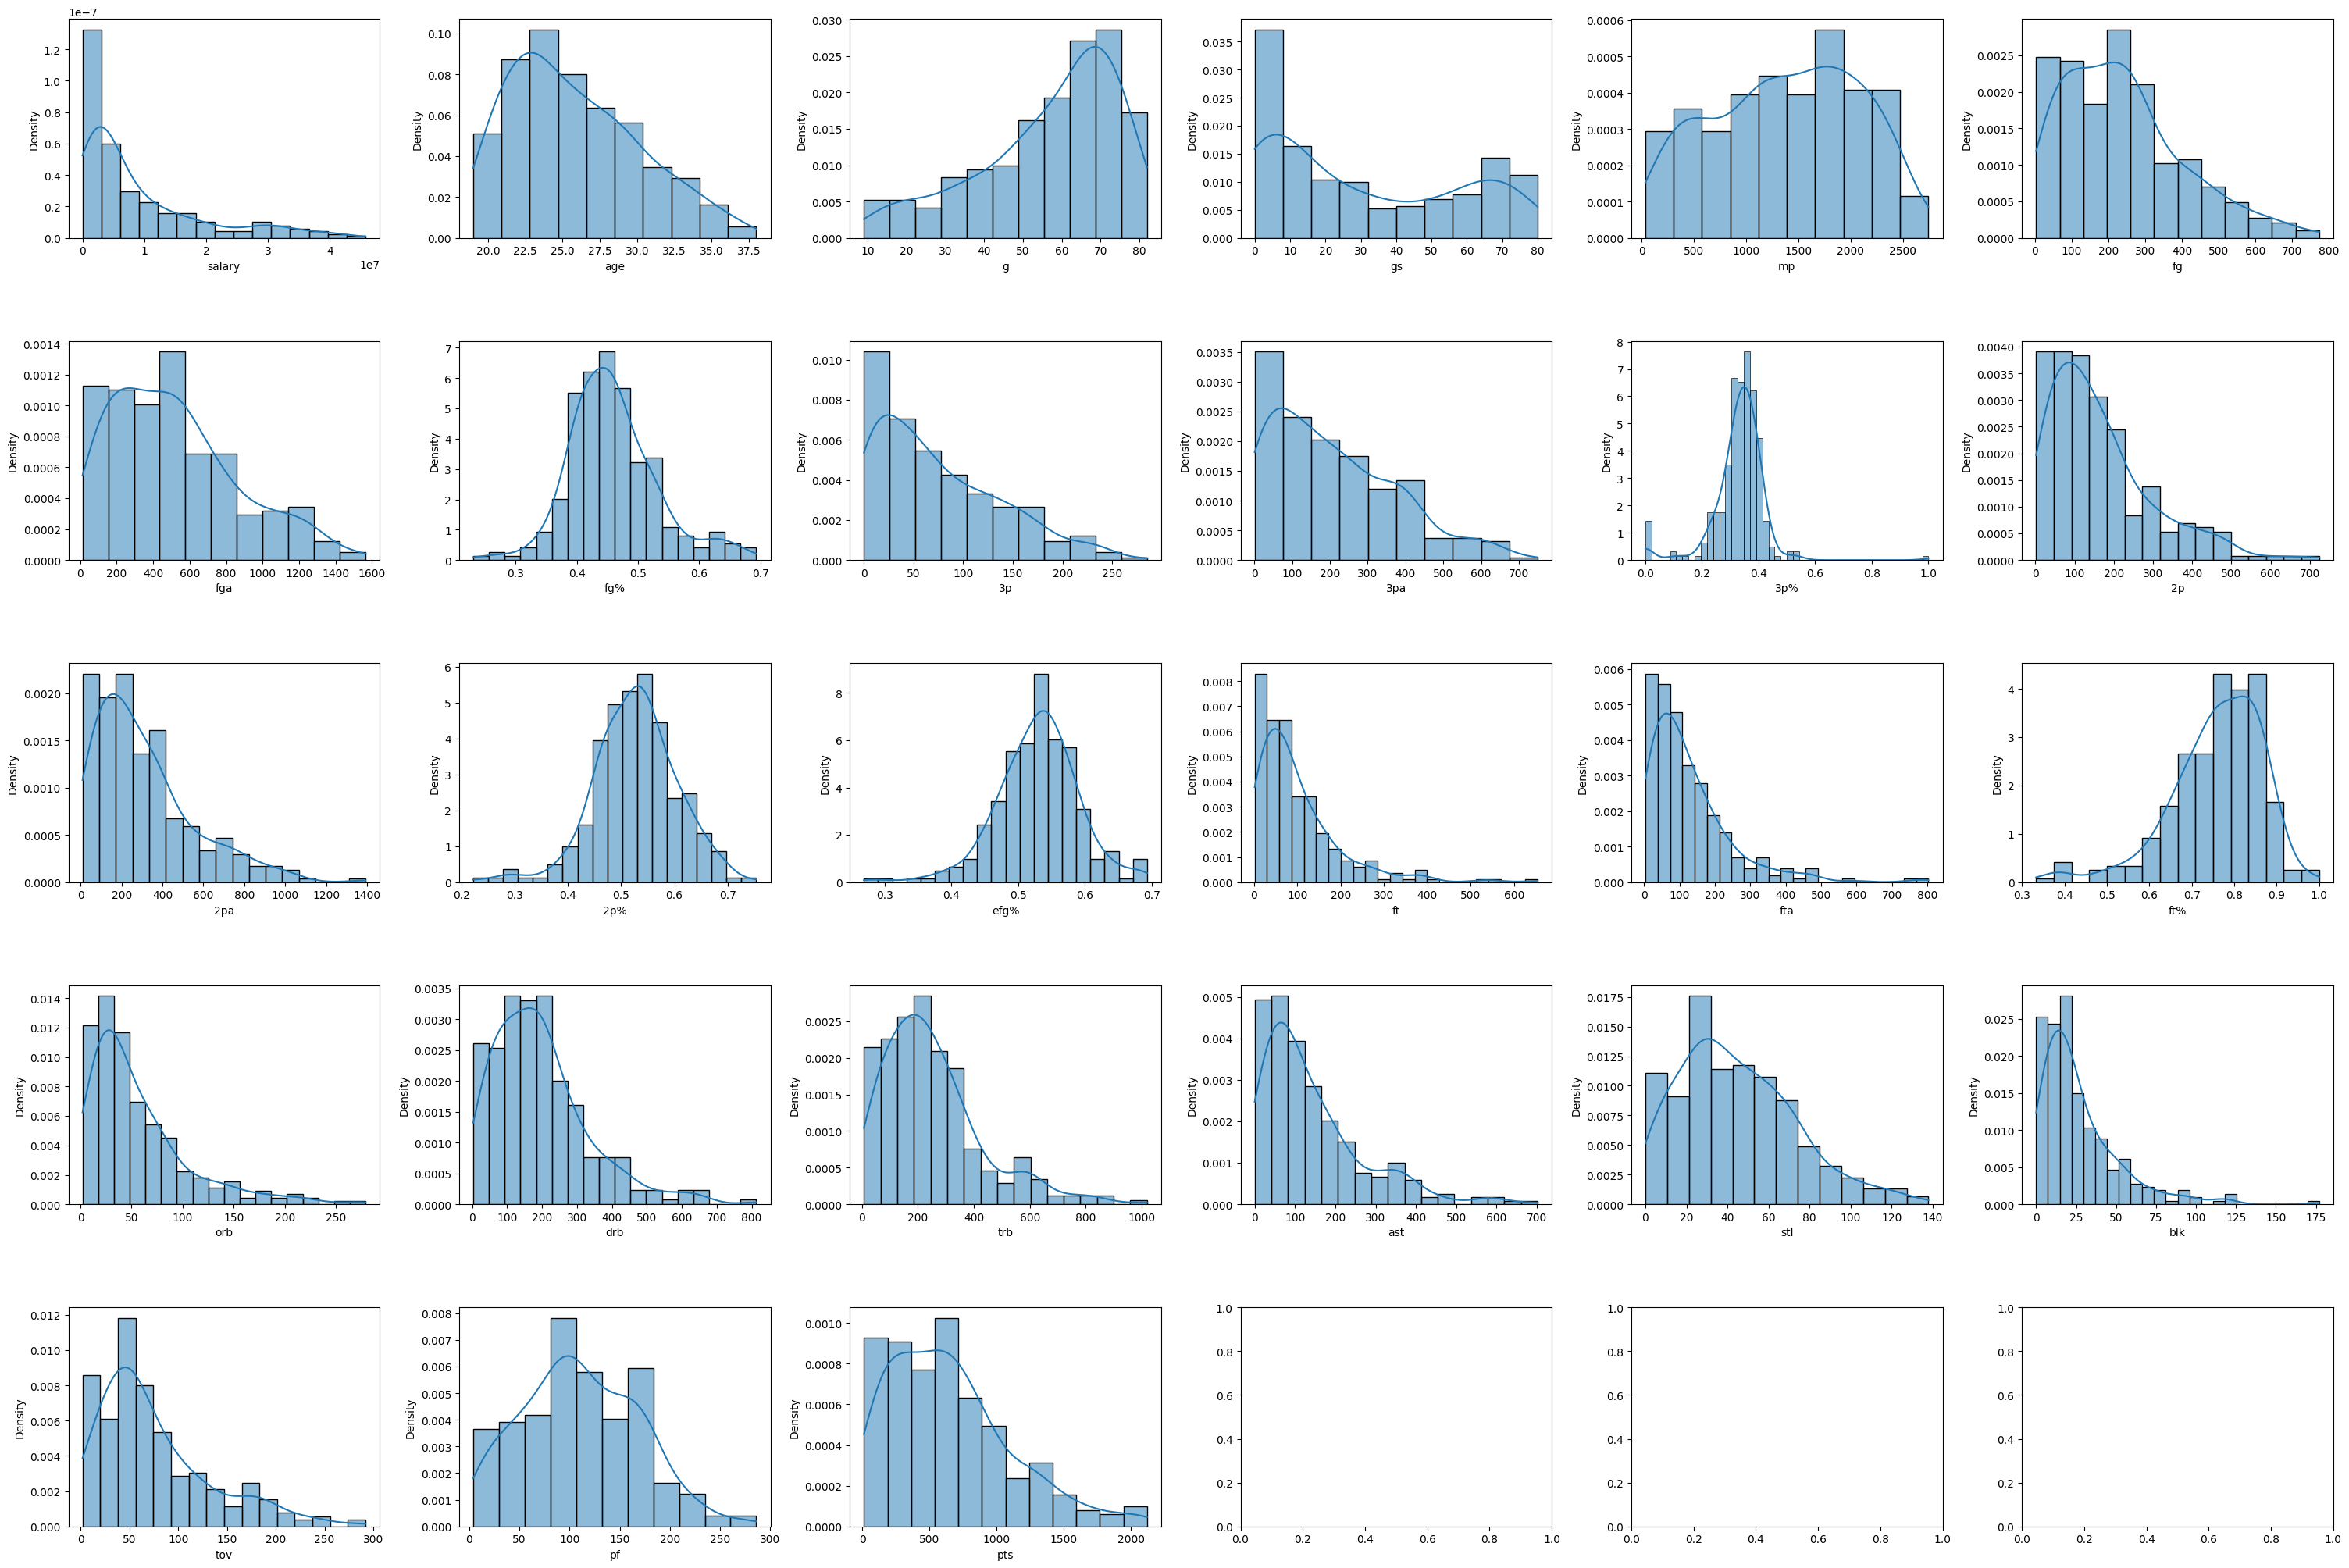

In [11]:
fig,axes=plt.subplots(nrows=5,ncols=6,figsize=(30,20))
index=0
axes=axes.flatten()
for k,v in nba_data_num.items():
  sns.histplot(v,ax=axes[index],kde=True,stat="density")
  index+=1
plt.tight_layout(pad=0.4,w_pad=0.8,h_pad=6.0)

<Axes: >

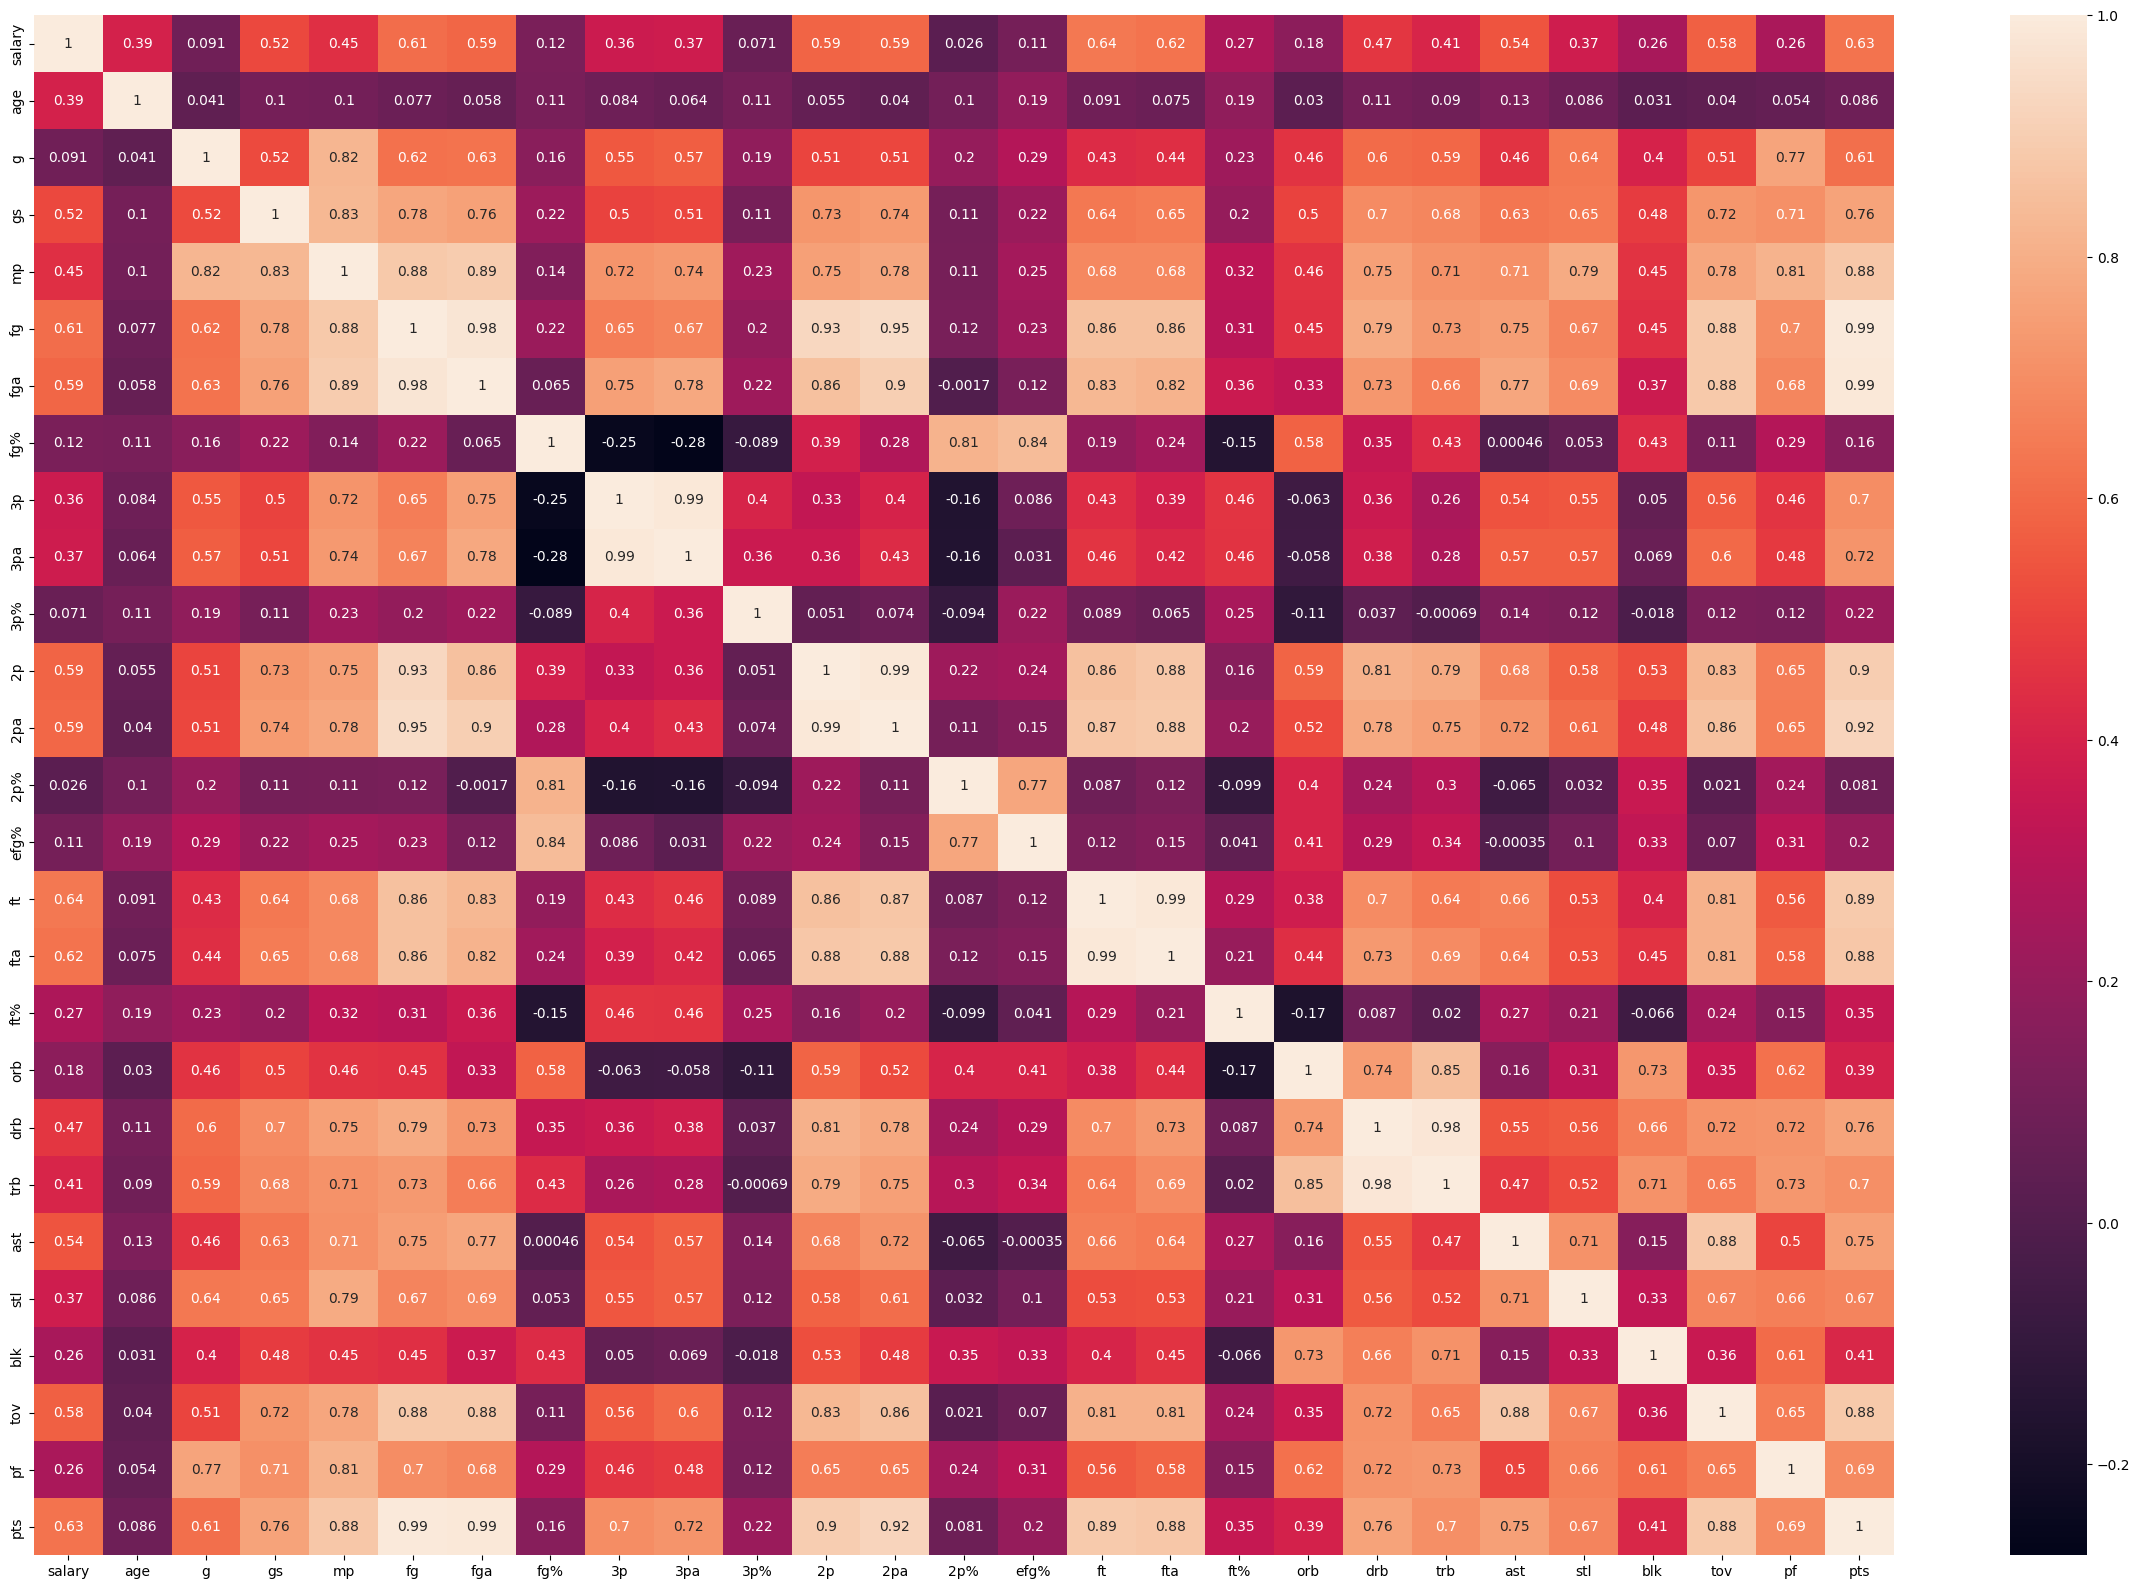

In [13]:
plt.figure(figsize=(30,20))
sns.heatmap(nba_data_num.corr(),annot=True)
# High correlation between fg, ft, fta, tov, pts so used to predict the label or give importance to this

In [17]:
# k = name of columns and v = data
for k,v in nba_data_num.items():
  q1=v.quantile(0.25)
  q3=v.quantile(0.75)
  iqr=q3-q1
  outliers=v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  percentage=np.shape(outliers)[0] *100.0 / np.shape(nba_data_num)[0]
  print("%s Outliers = %.2f%%" % (k, percentage))

salary Outliers = 9.69%
age Outliers = 0.00%
g Outliers = 1.73%
gs Outliers = 0.00%
mp Outliers = 0.00%
fg Outliers = 2.08%
fga Outliers = 0.69%
fg% Outliers = 4.84%
3p Outliers = 0.35%
3pa Outliers = 0.35%
3p% Outliers = 6.57%
2p Outliers = 4.50%
2pa Outliers = 4.15%
2p% Outliers = 2.42%
efg% Outliers = 3.81%
ft Outliers = 5.54%
fta Outliers = 5.54%
ft% Outliers = 2.77%
orb Outliers = 5.54%
drb Outliers = 4.15%
trb Outliers = 3.46%
ast Outliers = 4.15%
stl Outliers = 2.08%
blk Outliers = 5.54%
tov Outliers = 4.84%
pf Outliers = 0.35%
pts Outliers = 2.77%


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [23]:
# ct=make_column_transformer(
#    ( MinMaxScaler(),['age','pts']),
#    (OneHotEncoder(),['position'])
# )
ct=make_column_transformer(
   ( MinMaxScaler(),["fg", "ft", "fta", "tov", "pts"])
   )
# use CT to transform the data

In [20]:
X=nba_data_num.drop('salary',axis=1)
Y=nba_data_num['salary']

In [22]:
X_train , X_test, Y_train,Y_test = train_test_split(X,Y,test_size=20,random_state=66)

In [24]:
ct.fit(X_train)

X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [33]:
tf.random.set_seed(66)

nba_model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    # tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

nba_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=["mae"])

fit_data=nba_model.fit(X_train_normal,Y_train,epochs=300, verbose=0)

In [34]:
nba_model_loss , nba_model_mae = nba_model.evaluate(X_test_normal,Y_test)

1/1 [==============================] - 0s 119ms/step - loss: 5832137.0000 - mae: 5832137.0000


<Axes: xlabel='epoches', ylabel='loss'>

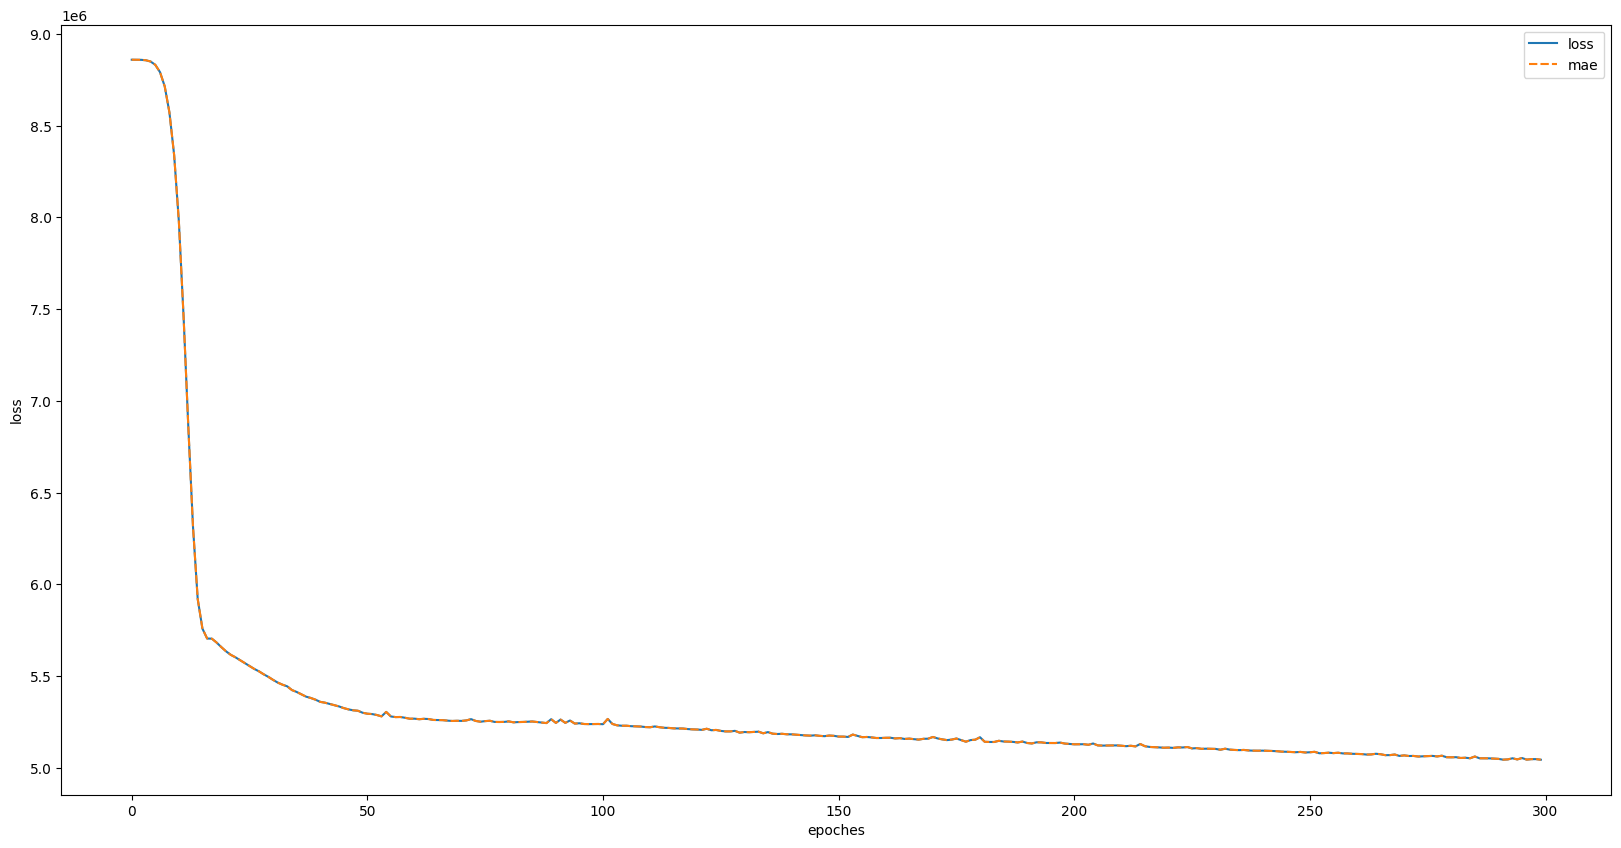

In [35]:
plt.figure(figsize=(20,10))
plt.ylabel("loss")
plt.xlabel("epoches")
sns.lineplot(data=fit_data.history)